## START RUNNING HERE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import os
import glob
import re
import json
import shutil
import datetime
import math
from datetime import datetime
import matplotlib.dates as mdates
pd.set_option('display.max_rows', 10000)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import os
import glob
import re
import shutil
from collections import Counter
from scipy.optimize import minimize
from scipy.special import logsumexp
import warnings
pd.set_option('display.max_rows', 10000)
np.set_printoptions(precision=64)
# pd.set_option('display.float_format', lambda x: f'{x:,.5f}')
# https://just-random-thoughts.blog/2021/01/23/cdc-ensemble-forecast-model-for-covid-19/
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
year_inf= 2023
year_sup= 2024
# season= str(year_inf)+"_"+str(year_sup)+"_"+"season"
# path= "./FluSight-forecast-hub/model-output/"
path= "./Flusight-forecast-data-master/data-forecasts/" 
All_paths= [x[0] for x in os.walk(path)][1:]
# All_paths
teams= [i.rsplit('/', 1)[-1] for i in All_paths]
teams

['LosAlamos_NAU-CModel_Flu',
 'VTSanghani-Transformer',
 'SigSci-TSENS',
 'ISU_NiemiLab-Flu',
 'MIGHTE-Nsemble',
 'LUcompUncertLab-VAR2K_plusCOVID',
 'CU-ensemble',
 'JHUAPL-Gecko',
 'SGroup-RandomForest',
 'VTSanghani-ExogModel',
 'LUcompUncertLab-hier_mech_model',
 'SigSci-CREG',
 'UMass-trends_ensemble',
 'CMU-TimeSeries',
 'UNC_IDD-InfluPaint',
 'LUcompUncertLab-KalmanFilter',
 'SGroup-SIkJalpha',
 'Umass-ARIMA',
 'CEID-Walk',
 'LUcompUncertLab-humanjudgment',
 'PSI-DICE',
 'IEM_Health-FluProject',
 'UT_FluCast-Voltaire',
 'CADPH-FluCAT_Ensemble',
 'JHU_IDD-CovidSP',
 'LUcompUncertLab-VAR2_plusCOVID',
 'LUcompUncertLab-ensemble_rclp',
 'UVAFluX-Ensemble',
 'UGA_flucast-OKeeffe',
 'LUcompUncertLab-stacked_ili',
 'UGuelph-FluPLUG',
 'LUcompUncertLab-VAR2K',
 'NIH-Flu_ARIMA',
 'LUcompUncertLab-HWAR2',
 'LUcompUncertLab-TEVA',
 'UMass-gbq',
 'CEPH-Rtrend_fluH',
 'GH-Flusight',
 'MOBS-GLEAM_FLUH',
 'LUcompUncertLab-VAR2',
 'LUcompUncertLab-experthuman',
 'GT-FluFNP']

In [3]:
data_locations= "Flusight-forecast-data-master"+"/"+"data-locations"+"/"+"locations.csv"
locations= pd.read_csv(data_locations)
locations

,abbreviation,location,location_name,population,count_rate1per100k,count_rate2per100k
0,US,US,US,331893745,3319,6638
1,AL,01,Alabama,5039877,50,101
2,AK,02,Alaska,732673,7,15
3,AZ,04,Arizona,7276316,73,146
4,AR,05,Arkansas,3025891,30,61
5,CA,06,California,39237836,392,785
6,CO,08,Colorado,5812069,58,116
7,CT,09,Connecticut,3605597,36,72
8,DE,10,Delaware,1003384,10,20
9,DC,11,District of Columbia,670050,7,13


In [4]:
state_names= list(locations['location_name'].unique())

In [5]:
print(len(state_names))
state_names

54


['US',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'Puerto Rico',
 'Virgin Islands']

In [6]:
locations[['location_name', 'location']]

,location_name,location
0,US,US
1,Alabama,01
2,Alaska,02
3,Arizona,04
4,Arkansas,05
5,California,06
6,Colorado,08
7,Connecticut,09
8,Delaware,10
9,District of Columbia,11


In [7]:
state_idx_name= dict()
for st in state_names:
    selected_values = locations.loc[locations['location_name'] == st, 'location'].iloc[0]
    state_idx_name[st]= selected_values

In [8]:
past_seasons= "./Flusight-forecast-data-master/data-forecasts/" 
current_seasons= "./FluSight-forecast-hub-main/model-output/"

past_paths= [x[0] for x in os.walk(past_seasons)][1:]
# All_paths
past_teams= [i.rsplit('/', 1)[-1] for i in past_paths]
past_teams

current_paths= [x[0] for x in os.walk(current_seasons)][1:]
# All_paths
current_teams= [i.rsplit('/', 1)[-1] for i in current_paths]
current_teams

['LosAlamos_NAU-CModel_Flu',
 'VTSanghani-Ensemble',
 'UMass-flusion',
 'UM-DeepOutbreak',
 'SigSci-TSENS',
 'FluSight-baseline',
 'MIGHTE-Nsemble',
 'CU-ensemble',
 'GH-model',
 'SGroup-RandomForest',
 'UGuelphensemble-GRYPHON',
 'LUcompUncertLab-chimera',
 'FluSight-equal_cat',
 'SigSci-CREG',
 'UMass-trends_ensemble',
 'CMU-TimeSeries',
 'UNC_IDD-InfluPaint',
 'fjordhest-ensemble',
 'PSI-PROF_beta',
 'UGA_flucast-INFLAenza',
 'cfarenewal-cfaepimlight',
 'FluSight-ensemble',
 'Stevens-GBR',
 'CADPH-FluCAT_Ensemble',
 'PSI-PROF',
 'FluSight-lop_norm',
 'ISU_NiemiLab-NLH',
 'FluSight-national_cat',
 'UVAFluX-Ensemble',
 'ISU_NiemiLab-ENS',
 'cfa-flumech',
 'UGA_flucast-OKeeffe',
 'NIH-Flu_ARIMA',
 'CEPH-Rtrend_fluH',
 'ISU_NiemiLab-SIR',
 'MOBS-GLEAM_FLUH',
 'JHU_CSSE-CSSE_Ensemble',
 'UGuelph-CompositeCurve',
 'NU_UCSD-GLEAM_AI_FLUH',
 'UGA_flucast-Copycat',
 'GT-FluFNP']

In [9]:
consistent_teams= []
for team in past_teams:
    if team in current_teams:
        consistent_teams.append(team)

In [10]:
consistent_teams, len(consistent_teams)

(['LosAlamos_NAU-CModel_Flu',
  'SigSci-TSENS',
  'MIGHTE-Nsemble',
  'CU-ensemble',
  'SGroup-RandomForest',
  'SigSci-CREG',
  'UMass-trends_ensemble',
  'CMU-TimeSeries',
  'UNC_IDD-InfluPaint',
  'CADPH-FluCAT_Ensemble',
  'UVAFluX-Ensemble',
  'UGA_flucast-OKeeffe',
  'NIH-Flu_ARIMA',
  'CEPH-Rtrend_fluH',
  'MOBS-GLEAM_FLUH',
  'GT-FluFNP'],
 16)

In [11]:
# consistent_teams.remove('GT-FluFNP')
# consistent_teams.remove('CADPH-FluCAT_Ensemble')

In [12]:
# consistent_teams, len(consistent_teams)
# consistent_teams= ['MIGHTE-Nsemble', 'CU-ensemble', 'SGroup-RandomForest', 'UMass-trends_ensemble', 'CMU-TimeSeries', 'UNC_IDD-InfluPaint', 'UVAFluX-Ensemble', 

#                    'UGA_flucast-OKeeffe', 'NIH-Flu_ARIMA', 'CEPH-Rtrend_fluH', 'MOBS-GLEAM_FLUH']

consistent_teams.remove('GT-FluFNP')
consistent_teams.remove('CADPH-FluCAT_Ensemble')
consistent_teams.remove('UGA_flucast-OKeeffe')
consistent_teams, len(consistent_teams)

(['LosAlamos_NAU-CModel_Flu',
  'SigSci-TSENS',
  'MIGHTE-Nsemble',
  'CU-ensemble',
  'SGroup-RandomForest',
  'SigSci-CREG',
  'UMass-trends_ensemble',
  'CMU-TimeSeries',
  'UNC_IDD-InfluPaint',
  'UVAFluX-Ensemble',
  'NIH-Flu_ARIMA',
  'CEPH-Rtrend_fluH',
  'MOBS-GLEAM_FLUH'],
 13)

In [13]:
## Missed: MIGHTE-Nsemble, NIH-Flu_ARIMA 

In [14]:
true_data_c= pd.read_csv("./FluSight-forecast-hub-main/"+"target-data/"+"target-hospital-admissions.csv")
true_data= pd.read_csv("./Flusight-forecast-data-master/"+"data-truth/"+"truth-Incident Hospitalizations.csv")

In [15]:
baseline= glob.glob(os.path.join("./Flusight-forecast-data-master/"+"/"+"Flusight-baseline", "*.csv"))
current_baseline= glob.glob(os.path.join("./FluSight-forecast-hub-main"+"/"+"FluSight-baseline", "*.csv"))
current_baseline

['./FluSight-forecast-hub-main/FluSight-baseline/2023-11-04-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2024-04-06-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2024-02-03-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-10-14-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-12-23-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-11-18-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2024-02-17-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2024-04-20-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2024-03-23-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2024-03-09-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2024-01-20-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-10-28-FluSight-baselin

In [16]:
Baseline= baseline+current_baseline

In [17]:
ref_dates= []
target_end_dates= []

for file in baseline:
    dt= pd.read_csv(file)
    
    ref_dates.append(dt.forecast_date.iloc[0])
    target_end_dates.append(dt.target_end_date.iloc[0])
    
ref_dates.sort()
target_end_dates.sort()

In [18]:
current_baseline.sort()

In [19]:
current_baseline

['./FluSight-forecast-hub-main/FluSight-baseline/2023-10-14-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-10-21-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-10-28-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-11-04-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-11-11-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-11-18-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-11-25-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-12-02-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-12-09-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-12-16-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-12-23-FluSight-baseline.csv',
 './FluSight-forecast-hub-main/FluSight-baseline/2023-12-30-FluSight-baselin

In [20]:
c_ref_dates= []
c_target_end_dates= []

for file in current_baseline:
    dt= pd.read_csv(file)
    
    c_ref_dates.append(dt.reference_date.iloc[0])
    c_target_end_dates.append(dt.target_end_date.iloc[0])
    
c_ref_dates.sort()
c_target_end_dates.sort()

In [21]:
seasons= ["2022", "2023"]

In [22]:
def truth_data(true_data, wks, region):
    true_data= true_data.loc[true_data['location']== region]
    true_data= true_data.loc[true_data['date'].isin(wks)]
    return np.array(list(true_data.value))

In [23]:
for (i,l) in zip(ref_dates, target_end_dates):
    print(i, " * ", l)

2022-01-10  *  2022-01-15
2022-01-17  *  2022-01-22
2022-01-24  *  2022-01-29
2022-01-31  *  2022-02-05
2022-02-07  *  2022-02-12
2022-02-14  *  2022-02-19
2022-02-21  *  2022-02-26
2022-02-28  *  2022-03-05
2022-03-07  *  2022-03-12
2022-03-14  *  2022-03-19
2022-03-21  *  2022-03-26
2022-03-28  *  2022-04-02
2022-04-04  *  2022-04-09
2022-04-11  *  2022-04-16
2022-04-18  *  2022-04-23
2022-04-25  *  2022-04-30
2022-05-02  *  2022-05-07
2022-05-09  *  2022-05-14
2022-05-16  *  2022-05-21
2022-05-23  *  2022-05-28
2022-05-30  *  2022-06-04
2022-06-06  *  2022-06-11
2022-06-13  *  2022-06-18
2022-06-20  *  2022-06-25
2022-10-03  *  2022-10-08
2022-10-17  *  2022-10-22
2022-10-24  *  2022-10-29
2022-10-31  *  2022-11-05
2022-11-07  *  2022-11-12
2022-11-14  *  2022-11-19
2022-11-21  *  2022-11-26
2022-11-28  *  2022-12-03
2022-12-05  *  2022-12-10
2022-12-12  *  2022-12-17
2022-12-19  *  2022-12-24
2022-12-26  *  2022-12-31
2023-01-02  *  2023-01-07
2023-01-09  *  2023-01-14
2023-01-16  

In [24]:
true_data.loc[true_data["location"]== state_idx_name["US"]]

,date,location,location_name,value
7,2020-01-11,US,US,1
15,2020-01-18,US,US,0
23,2020-01-25,US,US,0
32,2020-02-01,US,US,0
42,2020-02-08,US,US,0
52,2020-02-15,US,US,0
62,2020-02-22,US,US,0
75,2020-02-29,US,US,0
106,2020-03-07,US,US,0
143,2020-03-14,US,US,0


In [25]:
tt= true_data.loc[true_data['location']== state_idx_name["US"]]
tt.loc[tt['date']== target_end_dates[0]]

,date,location,location_name,value
5303,2022-01-15,US,US,1651


In [26]:
weeks= ["EW40","EW41","EW42","EW43","EW44","EW45","EW46","EW47","EW48","EW49","EW50","EW51","EW52", "EW01","EW02","EW03","EW04","EW05","EW06","EW07","EW08","EW09","EW10","EW11","EW12","EW13","EW14","EW15","EW16","EW17","EW18","EW19","EW20","EW21","EW22","EW23","EW24","EW25","EW26","EW27","EW28","EW29","EW30","EW31","EW32","EW34","EW35","EW36","EW37","EW38","EW39"]
weeks_digits= ["01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","34","35","36","37","38","39", "40","41","42","43","44","45","46","47","48","49","50","51","52", "53", "54", "55", "56", ]
weeks_c= ["40","41","42","43","44","45","46","47","48","49","50","51","52", "53", "54", "55", "56", "01","02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","34","35","36","37","38"]

In [27]:
week_list= []
for i in weeks_digits:
    if len(str(i))==2:
        week_list.append(str(i))
    else:
        week_list.append("0"+str(i))

In [28]:
ref_weeks_mapped= dict()
target_weeks_mapped= dict()

In [29]:
for (w,date) in zip(week_list,ref_dates):
    ref_weeks_mapped[date]=w

In [30]:
ref_weeks_mapped

{'2022-01-10': '01',
 '2022-01-17': '02',
 '2022-01-24': '03',
 '2022-01-31': '04',
 '2022-02-07': '05',
 '2022-02-14': '06',
 '2022-02-21': '07',
 '2022-02-28': '08',
 '2022-03-07': '09',
 '2022-03-14': '10',
 '2022-03-21': '11',
 '2022-03-28': '12',
 '2022-04-04': '13',
 '2022-04-11': '14',
 '2022-04-18': '15',
 '2022-04-25': '16',
 '2022-05-02': '17',
 '2022-05-09': '18',
 '2022-05-16': '19',
 '2022-05-23': '20',
 '2022-05-30': '21',
 '2022-06-06': '22',
 '2022-06-13': '23',
 '2022-06-20': '24',
 '2022-10-03': '25',
 '2022-10-17': '26',
 '2022-10-24': '27',
 '2022-10-31': '28',
 '2022-11-07': '29',
 '2022-11-14': '30',
 '2022-11-21': '31',
 '2022-11-28': '32',
 '2022-12-05': '34',
 '2022-12-12': '35',
 '2022-12-19': '36',
 '2022-12-26': '37',
 '2023-01-02': '38',
 '2023-01-09': '39',
 '2023-01-16': '40',
 '2023-01-23': '41',
 '2023-01-30': '42',
 '2023-02-06': '43',
 '2023-02-13': '44',
 '2023-02-20': '45',
 '2023-02-27': '46',
 '2023-03-06': '47',
 '2023-03-13': '48',
 '2023-03-20'

In [31]:
regexYear = re.compile(r'-\d+')

def select_files(team,path):
    team= path+team
    csv_files= glob.glob(os.path.join(team, "*.csv"))
    csv_files.sort()
    return csv_files

In [32]:
consistent_teams

['LosAlamos_NAU-CModel_Flu',
 'SigSci-TSENS',
 'MIGHTE-Nsemble',
 'CU-ensemble',
 'SGroup-RandomForest',
 'SigSci-CREG',
 'UMass-trends_ensemble',
 'CMU-TimeSeries',
 'UNC_IDD-InfluPaint',
 'UVAFluX-Ensemble',
 'NIH-Flu_ARIMA',
 'CEPH-Rtrend_fluH',
 'MOBS-GLEAM_FLUH']

In [33]:
def extract_baseline(date,baseline):
    for file in baseline:
        if date in file:
            return file
            break

In [34]:
c_week_list= []

# for i in range(len(ref_dates)+1,-1, -1):
for i in weeks_c:
    if len(str(i))==2:
        c_week_list.append(str(i))
    else:
        c_week_list.append("0"+str(i))

In [35]:
c_ref_weeks_mapped= dict()

In [36]:
for (w,date) in zip(c_week_list,c_ref_dates):
    print(w,date)
    c_ref_weeks_mapped[date]=w

40 2023-10-14
41 2023-10-21
42 2023-10-28
43 2023-11-04
44 2023-11-11
45 2023-11-18
46 2023-11-25
47 2023-12-02
48 2023-12-09
49 2023-12-16
50 2023-12-23
51 2023-12-30
52 2024-01-06
53 2024-01-13
54 2024-01-20
55 2024-01-27
56 2024-02-03
01 2024-02-10
02 2024-02-17
03 2024-02-24
04 2024-03-02
05 2024-03-09
06 2024-03-16
07 2024-03-23
08 2024-03-30
09 2024-04-06
10 2024-04-13
11 2024-04-20
12 2024-04-27


In [37]:
all_dates= ref_dates+c_ref_dates
all_dates_forecast= target_end_dates+c_target_end_dates

In [38]:
true_data_c= true_data_c.loc[true_data_c['location']== state_idx_name["US"]]
true_data= true_data.loc[true_data['location']== state_idx_name["US"]]

In [39]:
true_data_c.drop("Unnamed: 0", axis= 1, inplace= True)
data_t = pd.concat([true_data_c, true_data], axis=0)

In [40]:
true_data_c.tail()

,date,location,location_name,value,weekly_rate
5875,2022-03-12,US,US,2223,0.669175
5928,2022-03-05,US,US,1889,0.568633
5981,2022-02-26,US,US,1669,0.502408
6034,2022-02-19,US,US,1512,0.455147
6087,2022-02-12,US,US,1237,0.372366


In [41]:
true_data.tail()

,date,location,location_name,value
10001,2023-09-16,US,US,854
10055,2023-09-23,US,US,1017
10109,2023-09-30,US,US,1137
10163,2023-10-07,US,US,1152
10217,2023-10-14,US,US,1276


In [42]:
tr= data_t.loc[data_t['location']== state_idx_name["US"]]

In [43]:
tr

,date,location,location_name,value,weekly_rate
45,2024-04-20,US,US,2946,0.886815
98,2024-04-13,US,US,3961,1.192354
151,2024-04-06,US,US,4952,1.490668
204,2024-03-30,US,US,5445,1.639073
257,2024-03-23,US,US,5911,1.779349
310,2024-03-16,US,US,7268,2.187838
363,2024-03-09,US,US,9113,2.743226
416,2024-03-02,US,US,10500,3.160746
469,2024-02-24,US,US,10454,3.146899
522,2024-02-17,US,US,10767,3.241119


In [44]:
def get_missing_dates(files, dates):
    
    not_found = True  
    for f in files:
        if dates not in f:
            not_found = False
            return dates
            break

In [45]:
def replace_baseline_c(team,path,ref_dates,baseline):
    csv_files= glob.glob(os.path.join(path+team, "*.csv"))
    files= []
    destination_folder= path+team
    new_file_name = None
    missed_dates= []

    for d in ref_dates:
        date= get_missing_dates(csv_files, d)
        if date != None:
            file= extract_baseline(date,baseline)
            files.append(file)
            missed_dates.append(d)

    
    files= list(set(files))
    missed_dates= list(set(missed_dates))

    for d in missed_dates:
        new_file_name= d+"-"+team+'.csv'
        
        for file in files:
            if d in file:
            
                if os.path.isfile(file):
                    destination_file = os.path.join(destination_folder, os.path.basename(file))
                    if not os.path.isfile(destination_file):
                        shutil.copy(file, destination_folder)
                    else:
                        print(f"File '{os.path.basename(file)}' already exists in '{destination_folder}'")
                else:
                    print(f"Source file '{file}' does not exist.")
                    
    files = os.listdir(path+team)
    directory_path = path+team
    
    files= [f for f in files if team not in f]

    for f in files:
        if f !='.DS_Store':
            file= f.replace('FluSight-baseline', team)

            original_file_path = os.path.join(directory_path, f)
            new_file_path = os.path.join(directory_path, file)
            os.rename(original_file_path, new_file_path)

In [46]:
def get_baseline_base_on_date(file, Baseline= Baseline):
    file_name = os.path.basename(file)
    date_string = file_name.split('/')[0][:10]
    
    result = [files for files in Baseline if date_string in files]
    
    return result

In [47]:
def get_next_data(file, csv_files):
    file_name = os.path.basename(file)
    date_string = file_name.split('/')[0][:10]
    
    result = [files for files in csv_files if date_string in files]
    
    return result

In [48]:
def get_data(csv, target,region):
    
    data= []
    ref_date= []
    target_end_date= []
    for file in csv:
        dt= pd.read_csv(file)
        col= [cl.lower() for cl in list(dt.columns)]
        dt.columns= col
        try:
            dt= dt.loc[dt['target']==target]
            dt= dt.loc[dt['type']=="quantile"]
            dt= dt.loc[(dt['location']==region)].dropna() 

            if len(dt) != 0: # because a region can miss a k-wk ahead for a given week
                data.append(dt.assign(cumulative=dt['value'].cumsum(), type="point").query('cumulative >= 0.5').iloc[0].value)

                ref_date.append(dt.forecast_date.iloc[0])
                target_end_date.append(dt.target_end_date.iloc[0])
            else:
                
                files= get_baseline_base_on_date(file, Baseline= Baseline)
                dt= pd.read_csv(files[0])
                col= [cl.lower() for cl in list(dt.columns)]
                dt.columns= col
                
                if 'target' in list(dt.columns):
                    dt= dt.loc[dt['target']==target]
                    dt= dt.loc[dt['type']=="quantile"]
                    dt= dt.loc[(dt['location']==region)].dropna()
                    
                    data.append(dt.assign(cumulative=dt['value'].cumsum(), type="point").query('cumulative >= 0.5').iloc[0].value)

                    ref_date.append(dt.forecast_date.iloc[0])
                    target_end_date.append(dt.target_end_date.iloc[0])
            
            
              
        except KeyError as e: 
            target_mapped= mapping_target[target]
            dt= pd.read_csv(file)
            col= [cl.lower() for cl in list(dt.columns)]
            dt.columns= col
            dt= dt.loc[dt['horizon']==target_mapped]
            dt= dt.loc[dt['output_type']=="quantile"]
            dt= dt.loc[(dt['location']==region)].dropna()
            if len(dt) != 0:
                data.append(dt.assign(cumulative=dt['value'].cumsum(), type="point").query('cumulative >= 0.5').iloc[0].value)
            else:
                files= get_baseline_base_on_date(file, Baseline= Baseline)
                dt= pd.read_csv(files[0])
                col= [cl.lower() for cl in list(dt.columns)]
                dt.columns= col
                dt= dt.loc[dt['horizon']==target_mapped]
                dt= dt.loc[dt['output_type']=="quantile"]
                dt= dt.loc[(dt['location']==region)].dropna()
                data.append(dt.assign(cumulative=dt['value'].cumsum(), type="point").query('cumulative >= 0.5').iloc[0].value)

                
    return data, ref_date, target_end_date

In [49]:
horizon= [-1, 0, 1, 2, 3]
# 1 wk ahead: 0, 2 wk ahead: 1, 3 wk ahead: 2, 4 wk ahead: 3
# -1, we can combine teams equally.
mapping_target= {"1 wk ahead inc flu hosp":0, "2 wk ahead inc flu hosp":1,
                "3 wk ahead inc flu hosp":2, "4 wk ahead inc flu hosp":3, "5 wk ahead inc flu hosp":-1
                }

In [50]:
target= "1 wk ahead inc flu hosp"
target

'1 wk ahead inc flu hosp'

In [51]:
h= mapping_target[target]
h

0

In [52]:
def get_data_c(csv,target,region):
# def get_data(team, csv,target,region):
    target_mapped= mapping_target[target]
    data= []
    ref_date= []
    target_end_date= []
    quantile_data= []
    for file in csv:
        dt= pd.read_csv(file)
        col= [cl.lower() for cl in list(dt.columns)]
        dt.columns= col
        if 'target' in list(dt.columns):    
            dt= dt.loc[dt['target']=="wk inc flu hosp"]
            dt= dt.loc[dt['horizon']==target_mapped]
            dt= dt.loc[dt['output_type']=="quantile"]

            dt= dt.loc[(dt['location']==region)].dropna()
            quantile_data.append(list(dt.values))

            if len(dt) != 0: # because a region can miss a k-wk ahead for a given week
                data.append(dt.assign(cumulative=dt['value'].cumsum(), type="point").query('cumulative >= 0.5').iloc[0].value)

                ref_date.append(dt.reference_date.iloc[0])
                target_end_date.append(dt.target_end_date.iloc[0])
            else:
                dt= pd.read_csv(current_baseline[-1])
                col= [cl.lower() for cl in list(dt.columns)]
                dt.columns= col
                dt= dt.loc[dt['horizon']==target_mapped]
                dt= dt.loc[dt['output_type']=="quantile"]

                dt= dt.loc[(dt['location']==region)].dropna()
                data.append(dt.assign(cumulative=dt['value'].cumsum(), type="point").query('cumulative >= 0.5').iloc[0].value)
                

                
    return data, ref_date, target_end_date,quantile_data

In [53]:
def transform_data(n,m,d,best_teams):
    res= []
    consistent_teams= []
    for team in range(m):
        if len(d[team])==n: # To select the number consistent teams
            res.append(d[team])
            consistent_teams.append(best_teams[team])   
    return np.array(res).T,consistent_teams

In [54]:
def elements_not_in_every_string(list1, list2):
    result = []
    list1, list2= np.array(list1),np.array(list2)
    for element1 in list1:
        found_in_all_strings = all(element1 not in string2 for string2 in list2)
        result.append(found_in_all_strings)
    return list(list1[result])

def sort_key(s):
    digits = [c for c in s if c.isdigit()]  
    return (len(digits), digits) 

In [55]:
n_past_weeks= 66 # fixed window size.

def selected_weeks(i, csv_files, number_wk_ahead= int(target[0])):
    past_weeks= all_dates[:n_past_weeks-1]# all_dates[i:i+n_past_weeks]
    
#     forecasted_week= all_dates[n_past_weeks-1+h] 
    forecasted_week= all_dates[n_past_weeks+h] #all_dates[n_past_weeks+h-1]
    
    validate_Week= all_dates[:n_past_weeks][-1] #all_dates[n_past_weeks] #past_weeks[-1]# all_dates[n_past_weeks-1+h-1]
    
    res_future= [csv for csv in csv_files if forecasted_week in csv]
    val_file= [csv for csv in csv_files if validate_Week in csv]
    res_past= []
    for w in past_weeks:
        for week_subs in csv_files:
            if w in week_subs:
                res_past.append(week_subs)
    return res_past, res_future,val_file

In [56]:
def organize_data(n_past_weeks, files):
    n_past_weeks,files= n_past_weeks,files
    res,next_wk, val_w= selected_weeks(n_past_weeks,files)
    
    next_wk_files= []
    for nex_w in next_wk:
        next_wk_files.append(nex_w)
    return res,next_wk, val_w

In [57]:
def truth_data(true_data, wks, region):
    true_data= true_data.loc[true_data['location']== region]
    true_data= true_data.loc[true_data['date'].isin(wks)]
    true_data= true_data.sort_values(by='date', ascending=True)
    return np.array(list(true_data.value)[:len(wks)])

In [58]:
Baseline= baseline+current_baseline

In [59]:
# ## This is projected GD with momentum.
# def objective(theta, X, y):
#     mse= np.sum((y-X@theta) ** 2)/(2*len(y))
#     return mse

# def grad_mse(theta, X, y):
#     return -X.T@(y-X@theta)/len(y)


# def theta_initialization(n_best):
#     return 0.01*np.random.rand(n_best,)


# ## This is projected GD with momentum.
# def objective(theta, X, y):
#     mse= np.sum((y-X@theta) ** 2)/(2*len(y))
#     return mse

# def grad_mse(theta, X, y):
#     return -X.T@(y-X@theta)/len(y)


# def theta_initialization(n_best):
#     return 0.01*np.random.rand(n_best,)


# def learning_step(x,y,x_test,y_test,n_best,lr,n_epochs, lambda_v= 0.0,early_stopping_patience= 5):
#     # lambda_v: Regularizer parameter
#     momentum= 0.99
#     losses= []
#     valid_loss= []
#     theta= theta_initialization(n_best) # Initialize the weights
#     theta = np.maximum(theta, 0)  # Ensure weights are non-negative
#     theta = theta / np.sum(theta)  # Ensure weights sum up to one
#     velocity = np.zeros_like(theta)
    
#     m= len(x)
#     ridge_reg_term = (lambda_v/2*m)*np.sum(np.square(theta))
#     no_improvement_count = 0
    
#     worst_loss= np.Inf
#     best_theta= None
#     epsilon = 1e-5
#     mean_ = np.mean(x, axis=1, keepdims=True)
#     var = np.var(x, axis=1, keepdims=True)
#     x = (x - mean_) / np.sqrt(var + epsilon)
    
#     if x.shape[1]<len(theta):
#         x= x.T
#     for epoch in range(n_epochs):
       
#        # Make predictions
#        y_preds= x@theta # ADD YOUR CODES
#        y_val_pred= x_test@theta

#        loss= objective(theta, x, y)
#        loss_val= objective(theta,x_test, y_test)

#        grad= grad_mse(theta, x, y)+(lambda_v * theta)
#        # Update rules with momentum
#        velocity = momentum * velocity + lr * grad
#        theta = theta - velocity
#        # Clip gradients to prevent explosion
# #        max_gradient = 5.0
# #        theta = np.clip(theta, -max_gradient, max_gradient)
       
#        theta = np.maximum(theta, 0)  # Ensure weights are non-negative
#        theta = theta / np.sum(theta)  # Ensure weights sum up to one
        
#        if worst_loss>loss_val:
#            worst_loss= loss_val
#            best_theta= theta
#            no_improvement_count = 0
#        else:
#            no_improvement_count += 1
            
#        if no_improvement_count >= early_stopping_patience:
#             break
    
#        ## APPEND loss to losses
#        losses.append(loss)
#        valid_loss.append(loss_val)
    
#     return best_theta, losses,valid_loss

In [60]:
def objective(theta, X, y):
    mse= np.sum((y-X@theta) ** 2)/(2*len(y))
    return mse

def grad_mse(X,y,theta):
    return -X.T@(y-X@theta)/len(y)


def theta_initialization(n_best):
    return 0.01*np.random.rand(n_best,)


## This is projected GD with momentum.
def objective(theta, X, y):
    mse= np.sum((y-X@theta) ** 2)/(2*len(y))
    return mse

def grad_mse(theta, X, y):
    return -X.T@(y-X@theta)/len(y)


def theta_initialization(n_best):
    return 0.01*np.random.rand(n_best,)


def learning_step(x,y,x_test,y_test,n_best,lr,n_epochs, lambda_v= 0.0,early_stopping_patience= 5):
    # lambda_v: Regularizer parameter
    momentum= 0.99
    losses= []
    valid_loss= []
    theta= theta_initialization(n_best) # Initialize the weights
    theta = np.maximum(theta, 0)  # Ensure weights are non-negative
    theta = theta / np.sum(theta)  # Ensure weights sum up to one
    velocity = np.zeros_like(theta)
    
    m= len(x)
    ridge_reg_term = (lambda_v/2*m)*np.sum(np.square(theta))
    no_improvement_count = 0
    
    worst_loss= np.Inf
    best_theta= None
    epsilon = 1e-5
    mean_ = np.mean(x, axis=1, keepdims=True)
    var = np.var(x, axis=1, keepdims=True)
    x = (x - mean_) / np.sqrt(var + epsilon)
    
    if x.shape[1]<len(theta):
        x= x.T
    for epoch in range(n_epochs):
       
       # Make predictions
       y_preds= x@theta # ADD YOUR CODES
       y_val_pred= x_test@theta

       loss= objective(theta, x, y)
       loss_val= objective(theta,x_test, y_test)

       grad= grad_mse(theta, x, y)+(lambda_v * theta)
       # Update rules with momentum
       velocity = momentum * velocity + lr * grad
       theta = theta - velocity
       # Clip gradients to prevent explosion
#        max_gradient = 5.0
#        theta = np.clip(theta, -max_gradient, max_gradient)
       
       theta = np.maximum(theta, 0)  # Ensure weights are non-negative
       theta = theta / np.sum(theta)  # Ensure weights sum up to one
        
       if worst_loss>loss_val:
           worst_loss= loss_val
           best_theta= theta
           no_improvement_count = 0
       else:
           no_improvement_count += 1
            
       if no_improvement_count >= early_stopping_patience:
            break
    
       ## APPEND loss to losses
       losses.append(loss)
       valid_loss.append(loss_val)
    
    return best_theta, losses,valid_loss

In [61]:
def find_target_date(dates):
    res= []
    for d in dates:
        res.append(all_dates_forecast[all_dates.index(d)])
    return res

In [62]:
def clear_data(truth_data_array,final_regime1_data):
    
    if final_regime1_data.shape[1]<len(truth_data_array):
        truth_data_array= truth_data_array[:-1]
        
    elif final_regime1_data.shape[1]>len(truth_data_array):
        final_regime1_data= final_regime1_data[:-1]
        
    return truth_data_array

In [63]:
def extract_date_from_text(entry):
    # Regular expression to find the date in the format YYYY-MM-DD
    match = re.search(r'\b\d{4}-\d{2}-\d{2}\b', entry)
    
    if match:
        return match.group(0)
    else:
        return '0000-00-00'  # Default value for sorting

def get_past_weight(theta_):
    res= []
    for (k,v) in theta_.items():
        res.append(v[-1])
    return np.array(res)

In [64]:
discount_factor= 0.5
def discount_memory(t_data,all_data):
    truth_data= t_data
    forcast= all_data
    L= truth_data-forcast
#     corrected_point_forecast= [0]*len(forcast)
#     corrected_point_forecast[0]= forcast[0]
    for k in range(1,len(forcast)):
        correction= 0.0
        for i in range(1, k+ 1):
            correction += (discount_factor**i)*L[k-i]

        forcast[k]= forcast[k-1]+correction
    
#     return forcast,truth_data,corrected_point_forecast,correction
    return forcast

# def discount_memory(t_data,all_data):
#     truth_data= t_data
#     forcast= all_data
#     correction_list= []
# #     corrected_point_forecast= [0]*len(forcast)
#     original_forecast= forcast.copy()
#     for k in range(1,len(forcast)):
#         correction= truth_data[k-1]/forcast[k-1]
#         correction_list.append(correction)
#         forcast[k]= correction*forcast[k]
# #         forcast[k]= corrected_point_forecast[k]
#     return forcast

In [65]:
def get_teams_data(target,region= state_idx_name["US"]):
    region= state_idx_name["US"]
    regex = re.compile(r'EW\d+')
    number_wk_ahead= int(target[0])
    
    final_data= []
    final_weeks= []
    next_week_data_list= []
    next_week_list= []
    training_loss= []
    truth_data_list= []
    all_length_weeks= []
    
    validation_team_data= []
    validation_truth= None
    
    region= region
    target= target
    
    final_regime1_data= []
    final_weeks_regime1= []
    all_length_weeks= []
    
    ref_weeks, target_end_weeks= [], []
    past_weeks= all_dates[:n_past_weeks-1]
    week_to_forecast= all_dates[n_past_weeks+h]
    validate_Week= all_dates[n_past_weeks-1] #all_dates[n_past_weeks-1+h-1] #past_weeks[-1] 
    
    target_dates= []
    final_regime1_data_val= []
    Teams_files= []
    base_c= None
    for team in consistent_teams:
        teams= path+team
        teams1= current_seasons+team
        
        csv_files= glob.glob(os.path.join(teams, "*.csv"))
        csv_files1= glob.glob(os.path.join(teams1, "*.csv"))
        csv_files.extend(csv_files1)
        
        csv_files= sorted(csv_files, key=lambda x: datetime.strptime(extract_date_from_text(x), '%Y-%m-%d'))
        csv,next_wk_file,val_file= organize_data(n_past_weeks,csv_files)
        csv= sorted(csv, key=lambda x: datetime.strptime(extract_date_from_text(x), '%Y-%m-%d'))
    
        
        if len(csv)<n_past_weeks:
            csv.extend([extract_baseline(d,Baseline) for d in elements_not_in_every_string(past_weeks, csv)]) 
            
        csv = sorted(csv, key=lambda x: datetime.strptime(extract_date_from_text(x), '%Y-%m-%d'))

        try:
            data, ref_date, target_end_date= get_data(csv, target= target,region= region)
        
        except KeyError as e:
            data, ref_date, _ ,_= get_data_c(csv,target= target,region= region)
         
        t_data= truth_data(data_t, find_target_date(past_weeks), region)
#         data= discount_memory(t_data,data)
#         final_regime1_data.append(data)
        final_regime1_data.append(data)

        
        if len(next_wk_file)==0:
            next_wk_file.extend([extract_baseline(all_dates[n_past_weeks+h],Baseline)])
          
        Teams_files.append(next_wk_file)
        
        # File to validate: 1 day before the forecast date.
        
        if len(val_file)==0:
            val_file.extend([extract_baseline(all_dates[:n_past_weeks][-1],Baseline)])
        
        data_val, c_target_end_dates,_= get_data(val_file,target,region= region)
        
        final_regime1_data_val.append(data_val)
        
        
        
        try:
            dt, _, _= get_data([extract_baseline(all_dates[n_past_weeks-1+h],Baseline)],target,region= region) 

        except KeyError as e:
            dt, _, _,_= get_data_c([extract_baseline(all_dates[n_past_weeks-1+h],Baseline)],target,region= region) 
        
        
                       

        for i in range(len(final_regime1_data_val)):
            if len(final_regime1_data_val[i])== 0:
                final_regime1_data_val[i]= dt
          
      
#     print("train on ", past_weeks, "and validate on ", all_dates[:n_past_weeks][-1], "and forecast: ",all_dates[n_past_weeks+h])
    final_regime1_data= np.array(final_regime1_data).T
    truth_data_array= truth_data(data_t, find_target_date(past_weeks), region)
    truth_data_array_c= np.array([truth_data(data_t, [all_dates_forecast[all_dates.index(validate_Week)]], region)[0]])

    final_regime1_data_val= np.array(final_regime1_data_val).squeeze()
    
    if h== -1:
        theta= np.array([1/len(consistent_teams)]*len(consistent_teams))
        
    else:
        theta,_,_= learning_step(final_regime1_data,truth_data_array,final_regime1_data_val,truth_data_array_c,n_best= len(consistent_teams),lr= 1e-4,n_epochs= 100, lambda_v= 0.0)
    

    final_regime1_data_val= np.array(final_regime1_data_val)@theta # To be changed based on horizon.
    return theta, Teams_files, past_weeks, week_to_forecast

In [66]:
# get_teams_data(target)
consistent_teams

['LosAlamos_NAU-CModel_Flu',
 'SigSci-TSENS',
 'MIGHTE-Nsemble',
 'CU-ensemble',
 'SGroup-RandomForest',
 'SigSci-CREG',
 'UMass-trends_ensemble',
 'CMU-TimeSeries',
 'UNC_IDD-InfluPaint',
 'UVAFluX-Ensemble',
 'NIH-Flu_ARIMA',
 'CEPH-Rtrend_fluH',
 'MOBS-GLEAM_FLUH']

In [67]:
target= "1 wk ahead inc flu hosp"
h= mapping_target[target]
mapping_target
# all_dates
h

0

In [68]:
def create_folder(main_folder,our_team_name):
    isExist = os.path.exists(main_folder)
    if not isExist:
        !mkdir {main_folder}
    !mkdir {main_folder}/{our_team_name}
    
    regions= ['US']
    short_target= ['1-wk-ahead-inc-flu-hosp','2-wk-ahead-inc-flu-hosp', '3-wk-ahead-inc-flu-hosp', '4-wk-ahead-inc-flu-hosp']

    for region in regions:
        !mkdir {main_folder}/{our_team_name}/{region}

        for target in short_target:   
            !mkdir {main_folder}/{our_team_name}/{region}/{target}

In [69]:
def data_kw_ahead_opt(region, weights):
    regions_name_as_stacked= 'US'
    
    
    if target== "5 wk ahead inc flu hosp":
        target_mapped= -1  
    else:
        target_mapped= mapping_target[target]
    d_template= pd.read_csv(region[0][0])
    d_template.columns= [col.lower() for col in d_template.columns]
    d_template= d_template.loc[d_template['output_type']=="quantile"]
    d_template= d_template.loc[d_template['location']==regions_name_as_stacked]
    d_template= d_template.loc[d_template['horizon']==target_mapped]

    data_f= []

    for team_data in range(len(region)):
        
        
        d= pd.read_csv(region[team_data][0])
        d.columns= [col.lower() for col in d.columns]
        d= d.loc[d['output_type']=="quantile"]
        d= d.loc[d['location']==regions_name_as_stacked]
        d= d.loc[d['horizon']== target_mapped]

        if len(np.array(d['value'].values)) != 0:
            data_f.append(np.array(d['value'].values)*weights[team_data]) 

               
        d_template['value']= np.array(data_f).sum(axis= 0)
#         print(d_template['value'])

        d_template.to_csv(main_folder+'/'+our_team_name+"/"+regions_name_as_stacked+"/"+"EWO_Without_correct"+"/"+target.replace("-"," ")+"."+"csv", index= False)

In [70]:
def save_data(region,weights_region):
    data_kw_ahead_opt(region, weights_region)

In [71]:
season= "2023-2024"
main_folder= "UGuelphensemble-GRYPHON" # This folder will contain everything
our_team_name= "UGuelphensemble-GRYPHON"

In [72]:
regions= ['US']
if h==-1:
    target= "5 wk ahead inc flu hosp"
else:
    target= target

In [73]:
def save_weights_(my_dictionary, value_to_add):
    for (key, value_list) in zip(my_dictionary.keys(),value_to_add):
        my_dictionary[key].append(value_list)
    return my_dictionary  

In [74]:
def average(my_dictionary):
    means_dict = {}
    for key, digit_list in my_dictionary.items():
        if digit_list:  # Check if the list is not empty to avoid division by zero
            mean_value = sum(digit_list) / len(digit_list)
            means_dict[key] = mean_value
        else:
            means_dict[key] = None  # Handle the case of an empty list
    return means_dict

In [75]:
def weighted_average(dict1,dict2):
    average_dict = {}

    for key in dict1.keys() & dict2.keys():  # Take the intersection of keys in both dictionaries
        average_value = (dict1[key] + dict2[key]) / 2
        average_dict[key] = average_value
    return average_dict

In [76]:
Teams_past_weights= dict.fromkeys(consistent_teams)
Teams_current_weights= dict.fromkeys(consistent_teams)

In [77]:
for k in Teams_past_weights.keys():
    Teams_past_weights[k]= []
    
for k in Teams_current_weights.keys():
    Teams_current_weights[k]= []

In [78]:
mapping_target= {
 '1 wk ahead inc flu hosp': 0,
 '2 wk ahead inc flu hosp': 1,
 '3 wk ahead inc flu hosp': 2,
 '4 wk ahead inc flu hosp': 3,   
}
mapping_target

{'1 wk ahead inc flu hosp': 0,
 '2 wk ahead inc flu hosp': 1,
 '3 wk ahead inc flu hosp': 2,
 '4 wk ahead inc flu hosp': 3}

In [79]:
def weighted_average(dict1,dict2):
    average_dict = {}

    for key in dict1.keys() & dict2.keys():  # Take the intersection of keys in both dictionaries
        average_value = (dict1[key]+dict1[key]) / 2
        average_dict[key] = average_value
    return average_dict

In [80]:
def check_weights_exploding(theta, theta_past):
    
    for value in theta:
        if math.isnan(value):
            theta= theta_past
            break
    return theta

In [81]:
Teams_past_weights= dict.fromkeys(consistent_teams)
Teams_current_weights= dict.fromkeys(consistent_teams)
#  dict.fromkeys(consistent_teams)
for k in Teams_past_weights.keys():
    Teams_past_weights[k]= []
    
for k in Teams_current_weights.keys():
    Teams_current_weights[k]= []

In [82]:
all_average_weight= {
 '0': None,
 '1': None,
 '2': None,
 '3': None,   
}

In [83]:
def save_weights(all_average_weight):
    for (k,v) in all_average_weight.items():
        json_string = json.dumps(v, indent=2)
        json_file_name = './Weights_without_correct/weights'+k+'.json'
        with open(json_file_name, 'w') as json_file:
            json_file.write(json_string)

In [84]:
def load_weights(h):

    json_file_name = './Weightswithout_correct/weights'+str(h)+'.json'
    Teams_past_weights= None

    with open(json_file_name, 'r') as json_file:
        Teams_past_weights = json.load(json_file)
    return Teams_past_weights

In [85]:
# load_weights(1)

In [86]:
## TRAINING (Not needed)
# ref_d, 
# ref_d, c_ref_dates[6:]
# c_ref_dates

In [ ]:
theta_past= None
# for ref_d in c_ref_dates[1:]:
# Training
for ref_d in c_ref_dates:
    
    print("Reference date: ", ref_d)
    
    Teams_past_weights= dict.fromkeys(consistent_teams)
    Teams_current_weights= dict.fromkeys(consistent_teams)

    for k in Teams_past_weights.keys():
        Teams_past_weights[k]= []
    
    for k in Teams_current_weights.keys():
        Teams_current_weights[k]= []
        
        
        
    for target in mapping_target:
        h= mapping_target[target]
        n_past_weeks= 3
        theta_past= None
        
        for i in range(len(all_dates)):
            
            if n_past_weeks>=len(all_dates)-h:
                break
            else:
                theta, Teams_files, past_weeks, week_to_forecast= get_teams_data(target)
                # Save past weights if they are not nan.
                if np.isnan(theta).any()==False:
                    theta_past= theta
                else:
                    # Use past weights in case of exploding.
                    theta= theta_past
#                 print(theta)
                
                ## Replace by by the previous weights if we have exploding.
                if week_to_forecast != ref_d:
                    Teams_past_weights= save_weights_(Teams_past_weights, theta)
                
                elif week_to_forecast== ref_d:
                    Teams_current_weights= save_weights_(Teams_current_weights, theta) 
                    Teams_averaged_past_weights= average(Teams_past_weights)
                    Teams_averaged_current_weights= average(Teams_current_weights)

                    Teams_averaged_weights= weighted_average(Teams_averaged_past_weights,Teams_averaged_current_weights)
                    theta= list(Teams_averaged_weights.values())
                    all_weights= theta
        
                    for region_index in range(len(Teams_files)):
                        save_data(Teams_files, theta)
                n_past_weeks+=1
            
#             json_string = json.dumps(Teams_averaged_weights, indent=2)  # Optional: indent for pretty formatting
 
#             json_file_name = 'weights'+str(h)+'.json'

#             # Open the JSON file in write mode
#             with open(json_file_name, 'w') as json_file:
#                 # Write the JSON string to the file
#                 json_file.write(json_string)
        ## Save all the weights here.      
        all_average_weight[str(h)]= Teams_past_weights
        
    d_h1= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/1 wk ahead inc flu hosp.csv")
    d_h2= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/2 wk ahead inc flu hosp.csv")
    d_h3= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/3 wk ahead inc flu hosp.csv")
    d_h4= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/4 wk ahead inc flu hosp.csv")

    res= pd.concat([d_h1, d_h2, d_h3,d_h4], axis= 0)

    res.to_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/EWO_Without_correct/"+ref_d+"-UGuelphensemble-GRYPHON.csv", index= False)

Reference date:  2023-10-14
Reference date:  2023-10-21
Reference date:  2023-10-28
Reference date:  2023-11-04
Reference date:  2023-11-11


In [ ]:
# all_dates

In [ ]:
def save_weights(all_average_weight):
    for (k,v) in all_average_weight.items():
        json_string = json.dumps(v, indent=2)
        json_file_name = './Weights_without_correct/weights'+k+'.json'
        with open(json_file_name, 'w') as json_file:
            json_file.write(json_string)

In [ ]:
save_weights(all_average_weight)

## NEXT WEEK FORECAST

In [110]:
## FOR NEW FORECAST
# all_dates= ref_dates+c_ref_dates
n_past_weeks= len(all_dates)-3
# c_ref_dates= c_ref_dates[-1]
# all_dates= all_dates[n_past_weeks:]
# all_dates= all_dates[n_past_weeks-4:]

In [111]:
h= 3
m= 2 # Increase it by one every week.
n_past_weeks= len(all_dates)-3-h-m
n_past_weeks

77

In [112]:
print(all_dates[n_past_weeks:])
all_dates= all_dates[n_past_weeks:]

['2024-03-09', '2024-03-16', '2024-03-23', '2024-03-30', '2024-04-06', '2024-04-13', '2024-04-20', '2024-04-27']


In [113]:
# n_past_weeks
# n_past_weeks>=len(all_dates)-h
# all_dates

In [114]:
def copy_past_Weights(Teams_past_weights):
    weights= []
    for (k,v) in Teams_past_weights.items():
        weights.append(v[-1])
    return np.array(weights)
c_ref_dates

['2023-10-14',
 '2023-10-21',
 '2023-10-28',
 '2023-11-04',
 '2023-11-11',
 '2023-11-18',
 '2023-11-25',
 '2023-12-02',
 '2023-12-09',
 '2023-12-16',
 '2023-12-23',
 '2023-12-30',
 '2024-01-06',
 '2024-01-13',
 '2024-01-20',
 '2024-01-27',
 '2024-02-03',
 '2024-02-10',
 '2024-02-17',
 '2024-02-24',
 '2024-03-02',
 '2024-03-09',
 '2024-03-16',
 '2024-03-23',
 '2024-03-30',
 '2024-04-06',
 '2024-04-13',
 '2024-04-20',
 '2024-04-27']

In [115]:
# print(all_dates[n_past_weeks-4:])
# Teams_past_weights= load_weights(h)
# Teams_past_weights
# mapping_target[target]
# load_weights(1)
# copy_past_Weights(Teams_past_weights)
c_ref_dates[-1]
c_ref_dates

['2023-10-14',
 '2023-10-21',
 '2023-10-28',
 '2023-11-04',
 '2023-11-11',
 '2023-11-18',
 '2023-11-25',
 '2023-12-02',
 '2023-12-09',
 '2023-12-16',
 '2023-12-23',
 '2023-12-30',
 '2024-01-06',
 '2024-01-13',
 '2024-01-20',
 '2024-01-27',
 '2024-02-03',
 '2024-02-10',
 '2024-02-17',
 '2024-02-24',
 '2024-03-02',
 '2024-03-09',
 '2024-03-16',
 '2024-03-23',
 '2024-03-30',
 '2024-04-06',
 '2024-04-13',
 '2024-04-20',
 '2024-04-27']

In [116]:
for ref_d in [c_ref_dates[-1]]:
    
    print("Reference date: ", ref_d)
    
    Teams_current_weights= dict.fromkeys(consistent_teams)
    
    for k in Teams_current_weights.keys():
        Teams_current_weights[k]= []
        
    
    for target in mapping_target:
        h= mapping_target[target]
        n_past_weeks= 3
        ## Load past weights
#         Teams_past_weights= load_weights(h)
#         theta_past= copy_past_Weights(Teams_past_weights)
        
        for i in range(len(all_dates)):
            
            if n_past_weeks>=len(all_dates)-h:
#             if True==False:
                break
            else:
                theta, Teams_files, past_weeks, week_to_forecast= get_teams_data(target)
                print(theta)
                # Save past weights if they are not nan.
                if np.isnan(theta).any()==False:
                    theta_past= theta
                else:
                    # Use past weights in case of exploding.
                    theta= theta_past
                
                ## Replace by by the previous weights if we have exploding.
                if week_to_forecast != c_ref_dates[-1]:
                    Teams_past_weights= save_weights_(Teams_past_weights, theta)
                
                elif week_to_forecast== ref_d:
                    Teams_current_weights= save_weights_(Teams_current_weights, theta) 
                    Teams_averaged_past_weights= average(Teams_past_weights)
                    Teams_averaged_current_weights= average(Teams_current_weights)

                    Teams_averaged_weights= weighted_average(Teams_averaged_past_weights,Teams_averaged_current_weights)
                    theta= list(Teams_averaged_weights.values())
                    all_weights= theta
        
                    for region_index in range(len(Teams_files)):
                        save_data(Teams_files, theta)
                n_past_weeks+=1
            
      
        all_average_weight[str(h)]= Teams_past_weights
        save_weights(all_average_weight)
        
    d_h1= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/New_nor_Disc_additive_correction/1 wk ahead inc flu hosp.csv")
    d_h2= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/New_nor_Disc_additive_correction/2 wk ahead inc flu hosp.csv")
    d_h3= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/New_nor_Disc_additive_correction/3 wk ahead inc flu hosp.csv")
    d_h4= pd.read_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/New_nor_Disc_additive_correction/4 wk ahead inc flu hosp.csv")

    res= pd.concat([d_h1, d_h2, d_h3,d_h4], axis= 0)

    res.to_csv("UGuelphensemble-GRYPHON/UGuelphensemble-GRYPHON/US/New_nor_Disc_additive_correction/"+ref_d+"-UGuelphensemble-GRYPHON.csv", index= False)

Reference date:  2024-04-27
[0.0904965123083101   0.15962733589641223  0.04934193802325054
 0.                   0.                   0.00839339694755668
 0.20626186049199452  0.035976472235937806 0.2720288736824265
 0.10556872575456215  0.02719641473508617  0.045108469924463275
 0.                  ]
[0.08281677258251628  0.07206605146111258  0.1254340814501246
 0.                   0.04316909691918203  0.015990384808848113
 0.17024676903392832  0.010167978695465055 0.16330350823227174
 0.14131898061701803  0.07000638009248696  0.10547999610704632
 0.                  ]
[0.09258961880875931  0.11313069731263797  0.042658687750557214
 0.012272682901506281 0.09878032642650851  0.09722328762622962
 0.04451498860159782  0.02076113845423983  0.07892421281861296
 0.2011462638305169   0.06867955211748285  0.1293185433513507
 0.                  ]
[0.                   0.07733447098153472  0.15954476324093791
 0.03604450555051479  0.03669340198221008  0.0826031553047748
 0.01422992538495146  

In [223]:
Teams_past_weights

{'LosAlamos_NAU-CModel_Flu': [0.15097357929874494,
  0.15132401221091732,
  0.1386057937432226,
  0.024702575145364124,
  0.23433631566620844,
  0.18458700087721316,
  0.09218285822992855,
  0.20760205934611614,
  0.23333155923351523,
  0.2580784968971033],
 'SigSci-TSENS': [0.09977533875918651,
  0.16643943541341058,
  0.148836378820337,
  0.0,
  0.03351427237106766,
  0.061280309022909846,
  0.033868274985049206,
  0.0,
  0.0,
  0.01774356589894816],
 'MIGHTE-Nsemble': [0.017205911188102104,
  0.023742632658442533,
  0.13160199026935612,
  0.0005879577733581886,
  0.005878053922216297,
  0.08920588436597615,
  0.05369140929246528,
  0.04964497200871881,
  0.03856554117062884,
  0.012712552385644102],
 'CU-ensemble': [0.0,
  0.0,
  0.00017730954281790052,
  0.15028603940938126,
  0.0,
  0.09094646533072166,
  0.09474224436608893,
  0.0,
  0.13814868135082597,
  0.0],
 'SGroup-RandomForest': [0.010325756484800334,
  0.020331434197093337,
  0.09204728232947487,
  0.26884450773443785,
  

Check if the file is generated.
## END RUNNING HERE

In [224]:
n_past_weeks
all_dates

['2024-02-24',
 '2024-03-02',
 '2024-03-09',
 '2024-03-16',
 '2024-03-23',
 '2024-03-30',
 '2024-04-06',
 '2024-04-13']

In [225]:
Teams_past_weights

{'LosAlamos_NAU-CModel_Flu': [0.15097357929874494,
  0.15132401221091732,
  0.1386057937432226,
  0.024702575145364124,
  0.23433631566620844,
  0.18458700087721316,
  0.09218285822992855,
  0.20760205934611614,
  0.23333155923351523,
  0.2580784968971033],
 'SigSci-TSENS': [0.09977533875918651,
  0.16643943541341058,
  0.148836378820337,
  0.0,
  0.03351427237106766,
  0.061280309022909846,
  0.033868274985049206,
  0.0,
  0.0,
  0.01774356589894816],
 'MIGHTE-Nsemble': [0.017205911188102104,
  0.023742632658442533,
  0.13160199026935612,
  0.0005879577733581886,
  0.005878053922216297,
  0.08920588436597615,
  0.05369140929246528,
  0.04964497200871881,
  0.03856554117062884,
  0.012712552385644102],
 'CU-ensemble': [0.0,
  0.0,
  0.00017730954281790052,
  0.15028603940938126,
  0.0,
  0.09094646533072166,
  0.09474224436608893,
  0.0,
  0.13814868135082597,
  0.0],
 'SGroup-RandomForest': [0.010325756484800334,
  0.020331434197093337,
  0.09204728232947487,
  0.26884450773443785,
  

In [226]:
n_past_weeks>=len(all_dates)-h
n_past_weeks
h

3

In [224]:
len(all_dates)-h

5

In [225]:
Teams_past_weights

{'LosAlamos_NAU-CModel_Flu': [0.19648421824066745,
  0.2472167118871641,
  0.23762729733867707,
  0.2540479515122457,
  0.3102669097791449,
  0.3275065340115208,
  0.3511477652451542,
  0.3919488872418561,
  0.4254330622240045,
  0.4515624311283733],
 'SigSci-TSENS': [0.09244177507616902,
  0.1162364844617498,
  0.09270277446165648,
  0.04520157125696929,
  0.073673715963105,
  0.07403057337606832,
  0.02061113544518026,
  0.047148356235224384,
  0.0652113127624585,
  0.010823213237722461],
 'MIGHTE-Nsemble': [0.004388360913309149,
  0.04418290543061547,
  0.0021699992667982095,
  0.11864996853739973,
  0.055801326759600034,
  0.028560318430503655,
  0.019433157266833614,
  0.0,
  0.025989124725476365,
  0.05016282896113235],
 'CU-ensemble': [0.1027484593304493,
  0.027704066025278425,
  0.16017818926309718,
  0.02754299626725343,
  0.06987454694653529,
  0.022728485372225868,
  0.0,
  0.06239767045338942,
  0.1308082713879807,
  0.11263792288553774],
 'SGroup-RandomForest': [0.0584622

In [226]:
Teams_current_weights

{'LosAlamos_NAU-CModel_Flu': [0.08312539812599107,
  0.2360455267747526,
  0.4018350643500824,
  0.38135885581607065],
 'SigSci-TSENS': [0.05414232602479781,
  0.06750308984120539,
  0.09520981242955755,
  0.05610141190756794],
 'MIGHTE-Nsemble': [0.061887323332945554,
  0.10744073178266549,
  0.0,
  0.054747018169005186],
 'CU-ensemble': [0.018494838897523673,
  0.04067052614986019,
  0.0031203096017851984,
  0.16987903292213366],
 'SGroup-RandomForest': [0.0, 0.06785216682525558, 0.034770190449093234, 0.0],
 'SigSci-CREG': [0.05784451914474552,
  0.11451039996298425,
  0.05090873648226534,
  0.06234944056939656],
 'UMass-trends_ensemble': [0.10902153967669528,
  0.11194417017265702,
  0.035980121513675925,
  0.0407275915086418],
 'CMU-TimeSeries': [0.04173089185882167, 0.0, 0.0, 0.0],
 'UNC_IDD-InfluPaint': [0.1781816852720001,
  0.046804076112814015,
  0.03358887484843207,
  0.12778295217356286],
 'UVAFluX-Ensemble': [0.1521909353432664,
  0.1070775816659264,
  0.19385971618969153,


In [227]:
theta

[0.07166206079317473,
 0.012613057261701957,
 0.0036850590435810343,
 0.3193241768608808,
 0.03296027905800863,
 0.15113176449642257,
 0.06380809122763036,
 0.05963406728535744,
 0.06783507885733345,
 0.015396898831049144,
 0.03493379902916686,
 0.12104497661873889,
 0.045970690636954234]

In [228]:
Teams_past_weights

{'LosAlamos_NAU-CModel_Flu': [0.19648421824066745,
  0.2472167118871641,
  0.23762729733867707,
  0.2540479515122457,
  0.3102669097791449,
  0.3275065340115208,
  0.3511477652451542,
  0.3919488872418561,
  0.4254330622240045,
  0.4515624311283733],
 'SigSci-TSENS': [0.09244177507616902,
  0.1162364844617498,
  0.09270277446165648,
  0.04520157125696929,
  0.073673715963105,
  0.07403057337606832,
  0.02061113544518026,
  0.047148356235224384,
  0.0652113127624585,
  0.010823213237722461],
 'MIGHTE-Nsemble': [0.004388360913309149,
  0.04418290543061547,
  0.0021699992667982095,
  0.11864996853739973,
  0.055801326759600034,
  0.028560318430503655,
  0.019433157266833614,
  0.0,
  0.025989124725476365,
  0.05016282896113235],
 'CU-ensemble': [0.1027484593304493,
  0.027704066025278425,
  0.16017818926309718,
  0.02754299626725343,
  0.06987454694653529,
  0.022728485372225868,
  0.0,
  0.06239767045338942,
  0.1308082713879807,
  0.11263792288553774],
 'SGroup-RandomForest': [0.0584622

## Next work   

In [ ]:
## Additive correction: How to estimate delta? instead of just choosing it.
## Learn delta from the past.
## Multiplicative correction instead of additive.

In [117]:
## Heatmap of team weights

In [121]:
h0= load_weights(0)
h0

{'LosAlamos_NAU-CModel_Flu': [0.0904965123083101,
  0.08281677258251628,
  0.09258961880875931,
  0.0,
  0.12780478704935666,
  0.08759774033184513,
  0.0060162107158415155,
  0.16341509533585824,
  0.055878587799172104,
  0.2062903771616082],
 'SigSci-TSENS': [0.15962733589641223,
  0.07206605146111258,
  0.11313069731263797,
  0.07733447098153472,
  0.07030707272288446,
  0.11591617290023569,
  0.0893323890683801,
  0.0,
  0.0,
  0.0],
 'MIGHTE-Nsemble': [0.04934193802325054,
  0.1254340814501246,
  0.042658687750557214,
  0.15954476324093791,
  0.20061192852043608,
  0.17109877965137776,
  0.11958533245027558,
  0.12847880685352242,
  0.085635085606944,
  0.10836490038093514],
 'CU-ensemble': [0.0,
  0.0,
  0.012272682901506281,
  0.03604450555051479,
  0.0,
  0.0,
  0.05381019008763911,
  0.0,
  0.0,
  0.0],
 'SGroup-RandomForest': [0.0,
  0.04316909691918203,
  0.09878032642650851,
  0.03669340198221008,
  0.0,
  0.01081785922006424,
  0.07754083897848472,
  0.0,
  0.0,
  0.0],
 '

In [123]:
avg0= average(h0)
avg0

{'LosAlamos_NAU-CModel_Flu': 0.09129057020932677,
 'SigSci-TSENS': 0.06977141903431978,
 'MIGHTE-Nsemble': 0.11907543039283612,
 'CU-ensemble': 0.010212737853966019,
 'SGroup-RandomForest': 0.026700152352644956,
 'SigSci-CREG': 0.07466546086279788,
 'UMass-trends_ensemble': 0.18454656511205444,
 'CMU-TimeSeries': 0.019599599198296368,
 'UNC_IDD-InfluPaint': 0.1842430617970828,
 'UVAFluX-Ensemble': 0.08815524377269439,
 'NIH-Flu_ARIMA': 0.06167210452803244,
 'CEPH-Rtrend_fluH': 0.07006765488594803,
 'MOBS-GLEAM_FLUH': 0.0}

In [126]:
s= 0.0
list0= []
for i in avg0.values():
    s+= i
    list0.append(i)

In [125]:
s

1.0

In [127]:
list0

[0.09129057020932677,
 0.06977141903431978,
 0.11907543039283612,
 0.010212737853966019,
 0.026700152352644956,
 0.07466546086279788,
 0.18454656511205444,
 0.019599599198296368,
 0.1842430617970828,
 0.08815524377269439,
 0.06167210452803244,
 0.07006765488594803,
 0.0]

In [128]:
h1= load_weights(1)

avg1= average(h1)
avg1

{'LosAlamos_NAU-CModel_Flu': 0.09129057020932677,
 'SigSci-TSENS': 0.06977141903431978,
 'MIGHTE-Nsemble': 0.11907543039283612,
 'CU-ensemble': 0.010212737853966019,
 'SGroup-RandomForest': 0.026700152352644956,
 'SigSci-CREG': 0.07466546086279788,
 'UMass-trends_ensemble': 0.18454656511205444,
 'CMU-TimeSeries': 0.019599599198296368,
 'UNC_IDD-InfluPaint': 0.1842430617970828,
 'UVAFluX-Ensemble': 0.08815524377269439,
 'NIH-Flu_ARIMA': 0.06167210452803244,
 'CEPH-Rtrend_fluH': 0.07006765488594803,
 'MOBS-GLEAM_FLUH': 0.0}

In [129]:
s= 0.0
list1= []
for i in avg1.values():
    s+= i
    list1.append(i)

In [130]:
list1

[0.09129057020932677,
 0.06977141903431978,
 0.11907543039283612,
 0.010212737853966019,
 0.026700152352644956,
 0.07466546086279788,
 0.18454656511205444,
 0.019599599198296368,
 0.1842430617970828,
 0.08815524377269439,
 0.06167210452803244,
 0.07006765488594803,
 0.0]

In [131]:
s

1.0

In [132]:
h2= load_weights(2)

avg2= average(h2)
avg2

{'LosAlamos_NAU-CModel_Flu': 0.09129057020932677,
 'SigSci-TSENS': 0.06977141903431978,
 'MIGHTE-Nsemble': 0.11907543039283612,
 'CU-ensemble': 0.010212737853966019,
 'SGroup-RandomForest': 0.026700152352644956,
 'SigSci-CREG': 0.07466546086279788,
 'UMass-trends_ensemble': 0.18454656511205444,
 'CMU-TimeSeries': 0.019599599198296368,
 'UNC_IDD-InfluPaint': 0.1842430617970828,
 'UVAFluX-Ensemble': 0.08815524377269439,
 'NIH-Flu_ARIMA': 0.06167210452803244,
 'CEPH-Rtrend_fluH': 0.07006765488594803,
 'MOBS-GLEAM_FLUH': 0.0}

In [133]:
s= 0.0
list2= []
for i in avg2.values():
    s+= i
    list2.append(i)

In [134]:
list2

[0.09129057020932677,
 0.06977141903431978,
 0.11907543039283612,
 0.010212737853966019,
 0.026700152352644956,
 0.07466546086279788,
 0.18454656511205444,
 0.019599599198296368,
 0.1842430617970828,
 0.08815524377269439,
 0.06167210452803244,
 0.07006765488594803,
 0.0]

In [135]:
h3= load_weights(3)

avg3= average(h3)
avg3

s= 0.0
list3= []
for i in avg3.values():
    s+= i
    list3.append(i)

In [136]:
list3

[0.09129057020932677,
 0.06977141903431978,
 0.11907543039283612,
 0.010212737853966019,
 0.026700152352644956,
 0.07466546086279788,
 0.18454656511205444,
 0.019599599198296368,
 0.1842430617970828,
 0.08815524377269439,
 0.06167210452803244,
 0.07006765488594803,
 0.0]

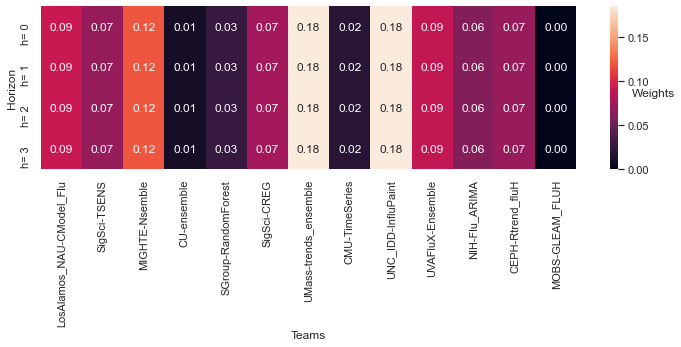

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Sample DataFrame
data = {
    'h= 0': list0,
    'h= 1': list1,
    'h= 2': list2,
    'h= 3': list3
}

df= pd.DataFrame(data)
df= df.T
df.columns= consistent_teams

colors = [(0, 'blue'), (1, 'white')]  # Blue for high values, white for low values
cmap = LinearSegmentedColormap.from_list('custom', colors)

# sns.set(font_scale=0.2)  # Adjust font scale
# sns.set(rc={'axes.grid': False, 'axes.linewidth': 0.2}) 

# Create heatmap with custom colormap
plt.figure(figsize=(12, 3))
heatmap = sns.heatmap(df, annot=True, fmt=".2f")
cbar = heatmap.collections[0].colorbar
cbar.set_label('Weights',rotation=0)

# Show the plot
# plt.title('Heatmap of DataFrame')
plt.xlabel('Teams', rotation=0)
plt.ylabel('Horizon')
plt.savefig('weights.png')
plt.show()

In [170]:
cmap=cmap

,0,1,2,3,4,5,6,7,8,9,10,11,12
h= 0,0.091291,0.069771,0.119075,0.010213,0.0267,0.074665,0.184547,0.0196,0.184243,0.088155,0.061672,0.070068,0.0
h= 1,0.091291,0.069771,0.119075,0.010213,0.0267,0.074665,0.184547,0.0196,0.184243,0.088155,0.061672,0.070068,0.0
h= 2,0.091291,0.069771,0.119075,0.010213,0.0267,0.074665,0.184547,0.0196,0.184243,0.088155,0.061672,0.070068,0.0
h= 3,0.091291,0.069771,0.119075,0.010213,0.0267,0.074665,0.184547,0.0196,0.184243,0.088155,0.061672,0.070068,0.0


In [203]:
df

,LosAlamos_NAU-CModel_Flu,SigSci-TSENS,MIGHTE-Nsemble,CU-ensemble,SGroup-RandomForest,SigSci-CREG,UMass-trends_ensemble,CMU-TimeSeries,UNC_IDD-InfluPaint,UVAFluX-Ensemble,NIH-Flu_ARIMA,CEPH-Rtrend_fluH,MOBS-GLEAM_FLUH
h= 0,0.091291,0.069771,0.119075,0.010213,0.0267,0.074665,0.184547,0.0196,0.184243,0.088155,0.061672,0.070068,0.0
h= 1,0.091291,0.069771,0.119075,0.010213,0.0267,0.074665,0.184547,0.0196,0.184243,0.088155,0.061672,0.070068,0.0
h= 2,0.091291,0.069771,0.119075,0.010213,0.0267,0.074665,0.184547,0.0196,0.184243,0.088155,0.061672,0.070068,0.0
h= 3,0.091291,0.069771,0.119075,0.010213,0.0267,0.074665,0.184547,0.0196,0.184243,0.088155,0.061672,0.070068,0.0
